In [10]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
(X_train,Y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [12]:
len(X_train)

60000

In [13]:
len(x_test)

10000

In [14]:
X_train.shape

(60000, 28, 28)

In [15]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [16]:
X_train = X_train/255
x_test = x_test/255

In [17]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [20]:
X_train_flattered = X_train.reshape(len(X_train),28*28)
x_test_flattered = x_test.reshape(len(x_test),28*28)
X_train_flattered.shape

(60000, 784)

In [21]:

model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy')


In [22]:
model.fit(X_train_flattered,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4745
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3037
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2834
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2730
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666


In [23]:
model.evaluate(x_test_flattered,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2670


0.2670236825942993

In [25]:
y_pred = model.predict(x_test_flattered)
y_pred[0]

313/313 [==============================] - 0s 1ms/step


array([1.5285641e-02, 2.5537358e-07, 6.2437046e-02, 9.5384425e-01,
       1.7648662e-03, 9.5091432e-02, 1.0276306e-06, 9.9972910e-01,
       9.3364052e-02, 6.6551208e-01], dtype=float32)

In [26]:
import numpy as np

In [27]:
np.argmax(y_pred[0])

7

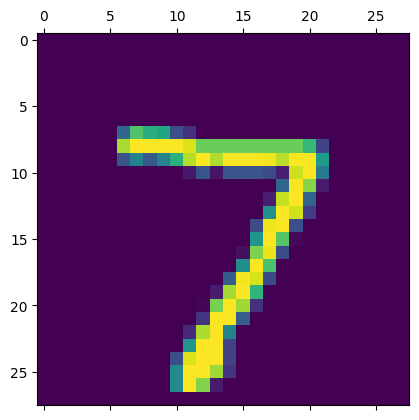

In [29]:
plt.matshow(x_test[0])

In [31]:
y_pred_label = [np.argmax(i) for i in y_pred]
y_pred_label[0]

7

In [37]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    5,    4,    2,    3,    1],
       [   0, 1108,    3,    2,    0,    1,    4,    2,   15,    0],
       [   3,    9,  927,   15,    7,    3,   11,   10,   42,    5],
       [   2,    0,   23,  914,    0,   27,    2,   10,   24,    8],
       [   2,    1,    7,    2,  903,    0,    8,    3,   11,   45],
       [   8,    2,    6,   34,   10,  772,    8,    5,   39,    8],
       [  14,    3,   10,    1,    8,   13,  903,    2,    4,    0],
       [   1,    5,   21,    9,    7,    1,    0,  940,    3,   41],
       [   5,    6,    7,   15,    9,   23,    8,   10,  882,    9],
       [  10,    7,    1,    8,   20,    5,    0,   13,    8,  937]],
      dtype=int32)>

In [35]:
import seaborn as sn  

<Axes: >

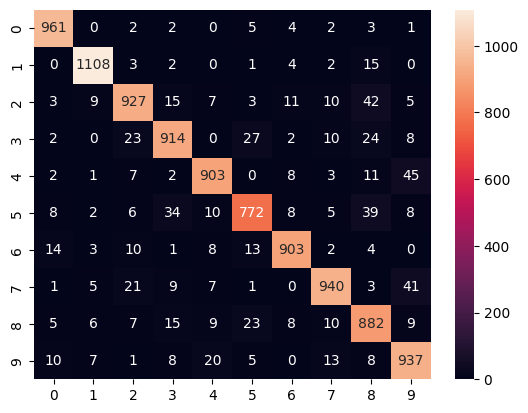

In [39]:
sn.heatmap(cm,annot=True,fmt='d')

In [40]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='tanh'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [44]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flattered,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2902 - accuracy: 0.9161
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1429 - accuracy: 0.9591
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0993 - accuracy: 0.9715
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0747 - accuracy: 0.9783
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0581 - accuracy: 0.9833


In [50]:
y_predi = model.predict(x_test_flattered)
np.argmax(y_predi[0])

313/313 [==============================] - 2s 7ms/step


7

In [51]:
y_predi_label = [np.argmax(i) for i in y_predi]

In [54]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predi_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    1,    2,    2,    6,    0,    1,    2],
       [   0, 1123,    2,    1,    0,    1,    4,    1,    3,    0],
       [   4,    2, 1005,    7,    3,    0,    2,    3,    6,    0],
       [   0,    0,    3,  991,    0,    6,    0,    5,    1,    4],
       [   1,    0,    4,    1,  957,    0,    3,    1,    1,   14],
       [   3,    0,    0,    5,    1,  869,    6,    0,    5,    3],
       [   6,    3,    3,    1,    2,    9,  933,    0,    1,    0],
       [   0,    4,   16,    4,    3,    1,    0,  989,    1,   10],
       [   5,    2,    5,    7,    3,   10,    3,    3,  932,    4],
       [   5,    4,    0,    6,    7,    4,    1,    1,    1,  980]],
      dtype=int32)>

<Axes: >

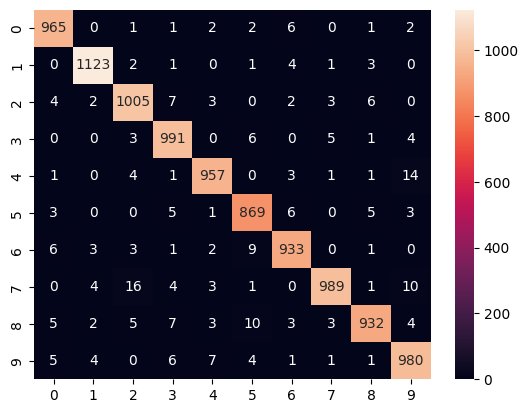

In [56]:
sn.heatmap(cm,annot=True,fmt='d')